# Day 31

In [36]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import scipy as sp

# 분류의 기초

분류(classification)는 독립 변수 혹은 feature가 주어졌을 때 가장 연관성이 큰 종속변수 카테고리(클래스)를 계산하는 문제이다. 현실적인 문제로 바꾸어 말하면 어떤 표본에 대한 데이터가 주어졌을 때 그 표본이 어떤 카테고리 혹은 클래스에 속하는지를 알아내는 문제이기도 하다. 선택해야 할 카테고리 혹은 클래스가 미리 주어졌다는 점에서 보기가 주어진 객관식 시험 문제를 푸는 것과 비슷하다고 말할 수 있다.


## 분류 문제를 푸는 방법

분류 문제를 푸는 방법은 크게 두 가지로 나눌 수 있다. 하나는 주어진 데이터에 대해(conditionally) 각 카테고리 혹은 클래스가 정답일 확률(conditional probability)를 계산하는 방법이고 또 다른 하나는 카테고리를 나누는 경계면으로부터 상대적으로 어떤 위치에 있는 지를 나타내는 판별 함수(discriminant function)를 계산하는 방법이다.

1. 조건부 확률(conditional probability) 기반
  * 1-1 조건부 확률 기반 판별(discriminative) 모형
  * 1-2 조건부 확률 기반 생성(generative) 모형
2. 판별 함수(discriminant function) 기반

## 분류 모형의 종류

| 모형 | 방법론 | 
|-|-|
| Linear/Quadratic Discriminant Analysis  | 조건부 확률 기반 생성(generative) 모형 |
| Naive Bayes | 조건부 확률 기반 생성(generative) 모형 |
| Logistic Regression | 조건부 확률 기반 판별(discriminative) 모형 |
| Decision Tree | 조건부 확률 기반 판별(discriminative) 모형 |
| K Nearest Neighbor | 조건부 확률 기반 판별(discriminative) 모형 |
| Perceptron | 판별 함수(discriminant function) 기반 모형 |
| Support Vector Machine | 판별 함수(discriminant function) 기반 모형 |
| Neural Network (Deep Learning) | 판별 함수(discriminant function) 기반 모형 |



## 조건부 확률 방법

출력 $y$ 는 클래스 $C_1, \cdots, C_K$ 중의 하나의 값을 가진다고 가정하자. 조건부 확률 방법은 출력 $y$ 가 이 각각의 클래스 값일 확률을 모두 계산해서 그 중 확률이 큰 클래스를 선택하는 방법이다. 물론 확률은 가지고 있는 모든 데이터에 의존하는 조건부 확률이어야 한다.

$$
\begin{eqnarray}
P_1 &=& P(y=C_1 \mid x_{1:N}, y_{1:N}, x_{N+1} ) \\
\vdots & & \vdots \\
P_K &=& P(y=C_K \mid x_{1:N}, y_{1:N}, x_{N+1} )\\
\end{eqnarray}
$$

Scikit-Learn 에서 조건부 확률을 사용하는 분류 모형들은 모두 `predict_proba` 메서드와 `predict_log_proba` 메서드를 지원한다. 이 메서드들은 독립 변수 $x$가 주어지면 종속 변수 $y$의 모든 카테고리 값에 대해 조건부 확률 또는 조건부 확률의 로그값을 계산한다. 

### QDA (Quadratic Discriminant Analysis)

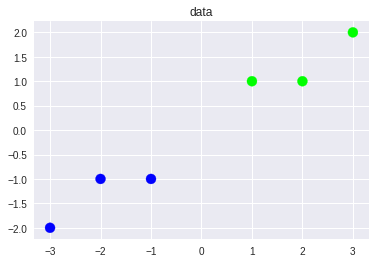

In [7]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
plt.scatter(X.T[0], X.T[1], c=y, s=100, cmap=mpl.cm.brg)
plt.title("data")
plt.show()

In [9]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis().fit(X, y)

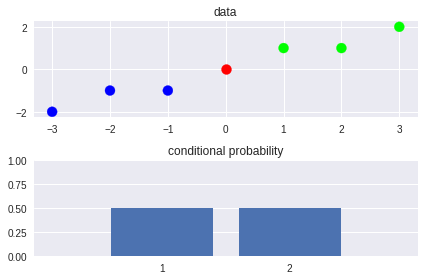

In [15]:
x = [[0, 0]]
p = model.predict_proba(x)[0]

plt.subplot(211)
plt.scatter(X.T[0], X.T[1], c=y, s=100, cmap=mpl.cm.brg)
plt.scatter(x[0][0], x[0][1], c='r', s=100)
plt.title("data")
plt.subplot(212)
plt.bar(model.classes_, p, align="center")
plt.title("conditional probability")
plt.axis([0, 3, 0, 1])
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.tight_layout()
plt.show()

In [16]:
model.predict(X)

array([1, 1, 1, 2, 2, 2])

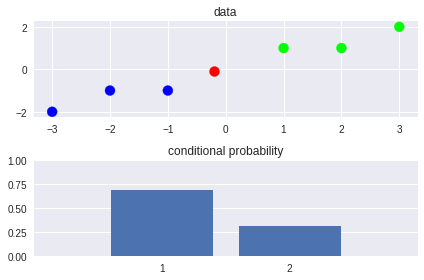

In [17]:
x = [[-0.2, -0.1]]
p = model.predict_proba(x)[0]

plt.subplot(211)
plt.scatter(X.T[0], X.T[1], c=y, s=100, cmap=mpl.cm.brg)
plt.scatter(x[0][0], x[0][1], c='r', s=100)
plt.title("data")
plt.subplot(212)
plt.bar(model.classes_, p, align="center")
plt.title("conditional probability")
plt.axis([0, 3, 0, 1])
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.tight_layout()
plt.show()

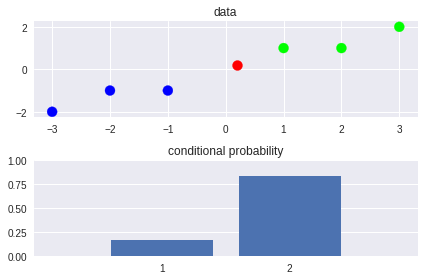

In [12]:
x = [[0.2, 0.2]]
p = model.predict_proba(x)[0]

plt.subplot(211)
plt.scatter(X.T[0], X.T[1], c=y, s=100, cmap=mpl.cm.brg)
plt.scatter(x[0][0], x[0][1], c='r', s=100)
plt.title("data")
plt.subplot(212)
plt.bar(model.classes_, p, align="center")
plt.title("conditional probability")
plt.axis([0, 3, 0, 1])
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.tight_layout()
plt.show()

**조건부 확률을 일일히 계산한다음에 가장 높은 확률로 알려주는 것이 확률론적 방법이다.대표적인 방법은 QDA, LDA, Naive Bayesian이다.**

### 나이브 베이지안 (Naive Bayesian) 모형

In [22]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

news = fetch_20newsgroups(subset="all")
model = Pipeline([
    ('vect', TfidfVectorizer(stop_words="english")),
    ('nb', MultinomialNB()),
])
model.fit(news.data, news.target)

x = news.data[:1]
y = model.predict(x)[0]
print(x[0])
print("=" * 80)
print("Actual Category:", news.target_names[news.target[0]])
print("Predicted Category:", news.target_names[y])

Download was incomplete, downloading again.


From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!


Actual Category: rec.sport.hockey
Predicted Category: rec.sport.hockey


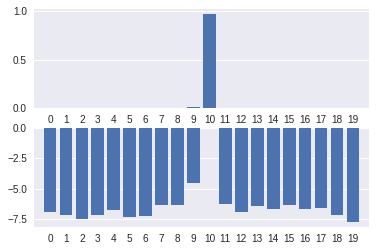

In [23]:
plt.subplot(211)
plt.bar(model.classes_, model.predict_proba(x)[0], align="center")
plt.xlim(-1, 20)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.subplot(212)
plt.bar(model.classes_, model.predict_log_proba(x)[0], align="center")
plt.xlim(-1, 20)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.show()

조건부 확률을 추정하는 방법도 크게 판별 모형(Discriminative Model)과 생성 모형(Generative  Model)으로 나누어진다.

## 조건부 확률 추정 방법 1 - 판별 모형 Discriminative Models

판별 모형(Discriminative Models)은 조건부 확률 $p(y \mid x)$ 이 몇 개의 모수(parametric)를 가지는 함수 형태로 표시될 수 있다고 가정하고 모수를 추정하는 방법이다. 카테고리에 따른 독립 변수의 분포인 우도(likelihood) $p(x \mid y)$ 를 알 필요가 없다.


로지스틱 회귀 모형(Logistic Regression)이나 의사 결정 나무(Decision Tree)는 판별 모형에 속한다.

### 로지스틱 회귀 모형

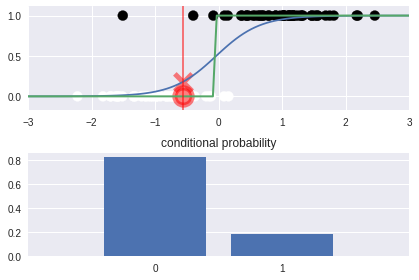

In [75]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)
model = LogisticRegression().fit(X0, y)

xx = np.linspace(-3, 3, 100)
sigm = 1.0/(1 + np.exp(-model.coef_[0][0]*xx - model.intercept_[0]))

plt.subplot(211)
plt.plot(xx, sigm)
plt.scatter(X0, y, marker='o', c=y, s=100)
plt.scatter(X0[0], model.predict(X0[[99]]), marker='o', s=300, c='r', lw=5, alpha=0.5)
plt.plot(xx, model.predict(xx[:, np.newaxis]) > 0.5, lw=2)
plt.scatter(X0[0], model.predict_proba(X0[:1])[0][1], marker='x', s=300, c='r', lw=5, alpha=0.5)
plt.axvline(X0[0], c='r', lw=2, alpha=0.5)
plt.xlim(-3, 3)
plt.subplot(212)
plt.bar(model.classes_, model.predict_proba(X0[:1])[0], align="center")
plt.xlim(-1, 2)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.title("conditional probability")
plt.tight_layout()
plt.show()

In [76]:
X0.shape

(100, 1)

### 의사 결정 나무

/home/jihoon_kim/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


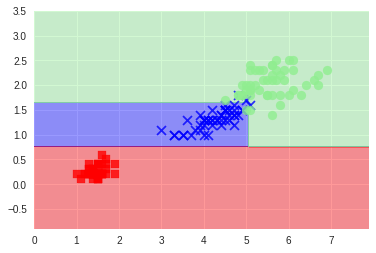

In [34]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0).fit(X_train, y_train)

test_idx=range(105,150)
resolution=0.01
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = mpl.colors.ListedColormap(colors[:len(np.unique(y_combined))])

x1_min, x1_max = X_combined[:, 0].min() - 1, X_combined[:, 0].max() + 1
x2_min, x2_max = X_combined[:, 1].min() - 1, X_combined[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
Z = tree.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], s=80, label=cl)


**Decision Tree같이 parameter가 없는 모델의 경우 non-parametric 모델이라 한다.**

## 조건부 확률 추정 방법 2 - 생성 모형 Generative Models

조건부 확률을 추정하는 두번째 방법은 베이지안 규칙을 사용하여 결합 확률 $p(x,y)$ 또는 우도(likelihood) $p(x \mid y)$에서 최종 조건부 확률 $p(y \mid x)$을 계산하는 것이다. 이 방법은 생성 모형(Generative Models)이라고 한다.
  
$$ p(y \mid x) = \dfrac{p(x,y)}{p(x)} = \dfrac{p(x \mid y)p(y)}{p(x)}$$
  
사전 확률 $p(y)$는 전체 확률의 법칙(Law of total probability)에서 계산할 수 있다.

$$ p(x) = \int p(x,y) dy = \int p(x \mid y)p(y) $$

$$ p(x) = \sum_{k=1}^K p(x,y_k) = \sum_{k=1}^K p(x \mid y_k) p(y_k) $$





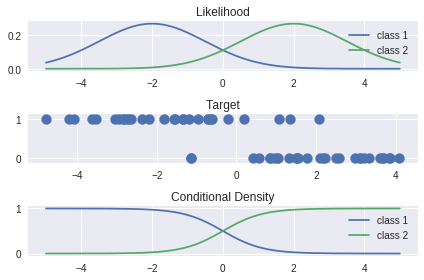

In [49]:
rv1 = sp.stats.norm(-2,1.5); 
rv2 = sp.stats.norm(2,1.5);

N = 30
x1 = rv1.rvs(N) 
x2 = rv2.rvs(N)
x = np.c_[x1, x2]
y = np.c_[np.ones(N), np.zeros(N)]
idx = np.random.shuffle([range(N)])
x = x[idx]
y = y[idx]

xx = np.linspace(-5,5,1000)
marginal = 0.5 * rv1.pdf(xx) + 0.5 * rv2.pdf(xx)
cond1 = 0.5 * rv1.pdf(xx)/marginal
cond2 = 0.5 * rv2.pdf(xx)/marginal

plt.subplot(311)
plt.plot(xx, rv1.pdf(xx), label="class 1")
plt.plot(xx, rv2.pdf(xx), label="class 2")
plt.title("Likelihood")
plt.legend()

plt.subplot(312)
plt.scatter(x, y, s=100)
plt.title("Target")

plt.subplot(313)
plt.plot(xx, cond1, label="class 1")
plt.plot(xx, cond2, label="class 2")
plt.title("Conditional Density")
plt.legend()

plt.tight_layout()
plt.show()

## 분별 함수(Discriminant Function) 기반 모형

또 다른 분류 방법은 동일한 클래스가 모여 있는 영역과 그 영역을 나누는 경계면(boundary plane)을 정의하는 것이다.
이 경계면은 경계면으로부터의 거리를 계산하는 $f(x)$ 형태의 함수인 분별 함수(Discriminant Function)로 정의된다. 

$$ \text{boundary plane}: \;\; f(x) = 0 $$

$$ \text{class 1}: \;\; f(x) > 0 $$

$$ \text{class 0}: \;\; f(x) < 0 $$

Scikit-Learn 에서 분별 함수 기반의 모형은 분별 함수 값을 출력하는 `decision_function` 메서드를 제공한다.

### 퍼셉트론(Perceptron)

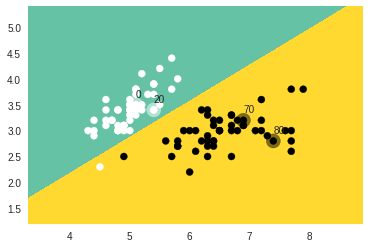

In [54]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris
iris = load_iris()
idx = np.in1d(iris.target, [0, 2])
X = iris.data[idx, 0:2]
y = iris.target[idx]

model = Perceptron(n_iter=100, eta0=0.1, random_state=1).fit(X, y)
XX_min = X[:, 0].min() - 1; XX_max = X[:, 0].max() + 1;
YY_min = X[:, 1].min() - 1; YY_max = X[:, 1].max() + 1;
XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000), np.linspace(YY_min, YY_max, 1000))
ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette("Set2"))
plt.contourf(XX, YY, ZZ, cmap=cmap)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
idx = [0, 20, 70, 80]
plt.scatter(X[idx, 0], X[idx, 1], c=y[idx], s=200, alpha=0.5)
for i in idx:
    plt.annotate(i, xy=(X[i, 0], X[i, 1]+0.15))
plt.grid(False)
plt.show()

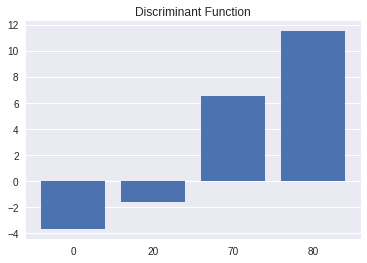

In [55]:
plt.bar(range(len(idx)), model.decision_function(X[idx]), align="center")
plt.xticks(range(len(idx)), idx)
plt.gca().xaxis.grid(False)
plt.title("Discriminant Function")
plt.show()

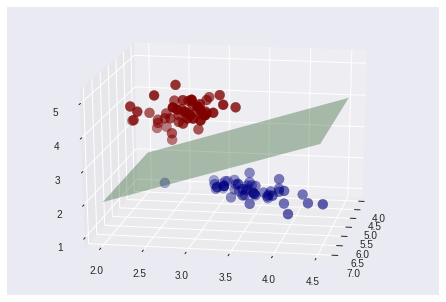

In [56]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2]
y = iris.target
idx = np.logical_or(iris.target == 0, iris.target == 1)
X = iris.data[idx, :3]
y = iris.target[idx]

fig = plt.figure()
ax = Axes3D(fig, elev=20, azim=10)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, marker='o', s=100, cmap=mpl.cm.jet);
ax.plot_surface(np.array([[4, 4], [7, 7]]), np.array([[2, 4.5], [2, 4.5]]),
                np.array([[2, 4], [2, 4]]), color='g', alpha=.3);

### 커널 SVM (Kernel Support Vector Machine)

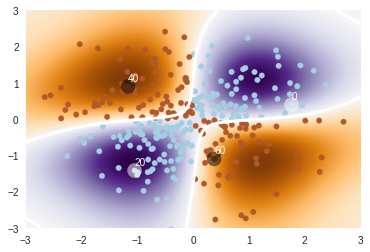

In [57]:
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

model = svm.NuSVC().fit(X, Y)
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=3, linetypes='--')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired)
idx = [0, 20, 40, 60]
plt.scatter(X[idx, 0], X[idx, 1], c=Y[idx], s=200, alpha=0.5)
for i in idx:
    plt.annotate(i, xy=(X[i, 0], X[i, 1]+0.15), color='white')
plt.grid(False)
plt.axis([-3, 3, -3, 3])
plt.show()

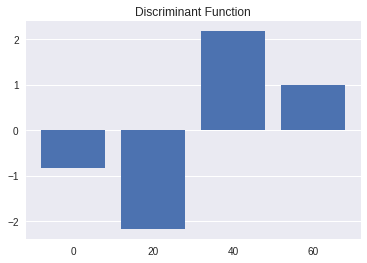

In [58]:
plt.bar(range(len(idx)), model.decision_function(X[idx]), align="center")
plt.xticks(range(len(idx)), idx)
plt.gca().xaxis.grid(False)
plt.title("Discriminant Function")
plt.show()

# 다중 클래스 분류

타겟 클래스가 2개 이상인 경우를 다중 클래스 분류(Multi-Class Classification) 문제라고 한다. 다중 클래스 분류 문제는 다음과 같이 여러개의 이진 클래스 분류(Binary Class Classification) 문제로 변환하여 해결한다.

## OvR (One-vs-the-Rest) 

* $K$개의 타겟 클래스가 존재하는 경우, 
* 각각의 클래스에 대해 표본이 속하는지 속하지 않는지의 이진 클래스 분류 문제를 풀고 
* 판결 기준값이 가장 큰 클래스를 선택


* `OneVsRestClassifier` 클래스 


## OvO (One-Vs-One) 

* $K$개의 타겟 클래스가 존재하는 경우, 
* 이 중 2개의 클래스 조합을 선택하여 $K(K - 1)/2$개의 이진 클래스 분류 문제를 풀고 
* 투표를 통해 가장 많은 표를 얻은 클래스를 선택
* 실제로는 정규화된 판결 기준값을 이용



* `OneVsOneClassifier` 클래스

In [77]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

iris = load_iris()
model1 = LogisticRegression().fit(iris.data, iris.target)
model2 = OneVsRestClassifier(LogisticRegression()).fit(iris.data, iris.target)
model3 = OneVsOneClassifier(LogisticRegression()).fit(iris.data, iris.target)

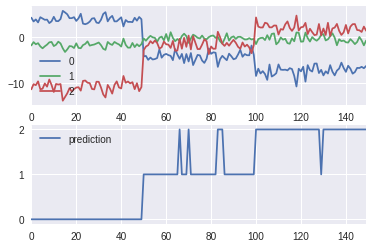

In [78]:
ax1 = plt.subplot(211)
pd.DataFrame(model1.decision_function(iris.data)).plot(ax=ax1)
ax2 = plt.subplot(212)
pd.DataFrame(model1.predict(iris.data), columns=["prediction"]).plot(ax=ax2)
plt.show()

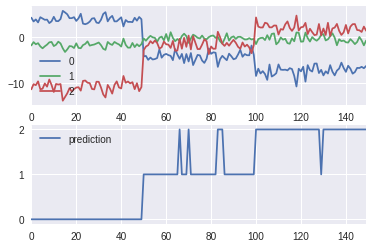

In [79]:
ax1 = plt.subplot(211)
pd.DataFrame(model2.decision_function(iris.data)).plot(ax=ax1)
ax2 = plt.subplot(212)
pd.DataFrame(model2.predict(iris.data), columns=["prediction"]).plot(ax=ax2)
plt.show()

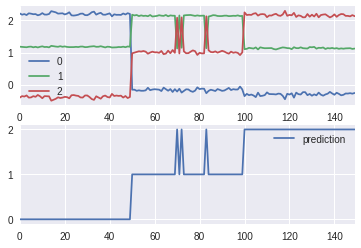

In [80]:
ax1 = plt.subplot(211)
pd.DataFrame(model3.decision_function(iris.data)).plot(ax=ax1)
ax2 = plt.subplot(212)
pd.DataFrame(model3.predict(iris.data), columns=["prediction"]).plot(ax=ax2)
plt.show()

# 로지스틱 회귀 분석

로지스틱 회귀(Logistic Regression) 분석은 회귀 분석이라는 명칭을 가지고 있지만 분류(classsification) 방법으로도 사용할 수 있다.

로지스틱 회귀 모형에서는 베르누이 확률 변수(Bernoilli random variable)의 모수(parameter) $\theta$가 독립 변수 $x$에 의존한다고 가정한다.

$$ p(y \mid x) = \text{Ber} (y \mid  \theta(x) )$$


여기에서 모수 $\theta$ 는 0과 1사이의 실수이며 다음과 같이 $x$의 값에 의존하는 함수이다.

$$
\theta = f(w^Tx)
$$


## 시그모이드 함수

모수 $\theta$는 일반적인 회귀 분석의 종속 변수와 달리 0 부터 1까지의 실수값만 가질 수 있기 때문에 시그모이드 함수(sigmoid function)이라 불리는 특별한 형태의 함수 $f$를 사용해야 한다.

시그모이드 함수는 종속 변수의 모든 실수 값에 대해 유한한 구간 $(a,b)$ 사이의 한정된(bounded) 값과 양의 기울기를 가지는 함수를 말하며 다음과 같은 함수들이 주로 사용된다.

 * 로지스틱 함수 (Logistic Function) 
 
$$ \text{logitstic}(z) = \dfrac{1}{1+\exp{(-z)}} $$
 
 * 오차 함수 (Error Function) 
 
$$ \text{erf}(z) = \frac{2}{\sqrt\pi}\int_0^z e^{-t^2}\,dt $$
 
 * 하이퍼볼릭 탄젠트 함수 (Hyperbolic tangent) 
 
$$ \tanh(z) = \frac{\sinh z}{\cosh z} = \frac {e^z - e^{-z}} {e^z + e^{-z}} $$
 
 * 역 탄젠트 함수 (Arc-tangent) 
 
$$ \arctan(z) = \tan^{-1}(z) $$


**시그모이드는 0에서 1까지의 실수값만 가질 수 있는 형태의 양의 기울기를 가지는 함수의 총칭이다. 즉 로지스틱함수는 시그모이드 함수이나 시그모이드 함수가 로지스틱함수인 것은 아니다. ** 시그모이드: 위아래 바운딩 monotonically 증가

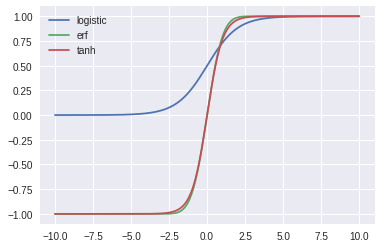

In [81]:
xx = np.linspace(-10, 10, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), label="logistic")
plt.plot(xx, sp.special.erf(0.5*np.sqrt(np.pi)*xx), label="erf")
plt.plot(xx, np.tanh(xx), label="tanh")
plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.show()

## 로지스틱 함수

여러가지 시그모이드 중 로지스틱 함수는 다음과 같은 물리적인 의미를 부여할 수 있기 때문에 많이 사용된다.

우선 Bernoulli 시도에서 1이 나올 확률 $\theta$ 과 0이 나올 확률 $1-\theta$ 의 비(ratio)는 다음과 같은 수식이 되며 odds ratio 라고 한다.

$$ \text{odds ratio} = \dfrac{\theta}{1-\theta} $$

이 odds ratio 를 로그 변환한 것이 로지트 함수(Logit function)이다.

$$ z = \text{logit}(\text{odds ratio}) = \log \left(\dfrac{\theta}{1-\theta}\right) $$ 

로지스틱 함수(Logistic function) 는 이 로지트 함수의 역함수이다.

$$ \text{logitstic}(z) = \theta(z) = \dfrac{1}{1+\exp{(-z)}} $$  

## 로지스틱 모형의 모수 추정

로지스틱 모형은 일종의 비선형 회귀 모형이지만 다음과 같이 MLE(Maximum Likelihood Estimation) 방법으로 모수 $w$를 추정할 수 있다.

여기에서는 종속 변수 $y$가 베르누이 확률 변수라고 가정한다.

$$ p(y \mid x, \theta) = \text{Ber} (y \mid  \theta(x) )$$

데이터 표본이 $\{ x_i, y_i \}$일 경우 Log Likelihood $\text{LL}$ 를 구하면 다음과 같다.

$$
\begin{eqnarray}
\text{LL} 
&=& \log \prod_{i=1}^N \theta_i(x_i)^{y_i} (1-\theta_i(x_i))^{1-y_i} \\
&=& \sum_{i=1}^N \left( y_i \log\theta_i(x_i) +  (1-y_i)\log(1-\theta_i(x_i)) \right) \\
\end{eqnarray}
$$

$\theta$가 로지스틱 함수 형태로 표현된다면

$$
\theta(x) = \dfrac{1}{1 + \exp{(-w^Tx)}}
$$

가 되고 이를  Log Likelihood 에 적용하면 다음과 같다.

$$
\begin{eqnarray}
\text{LL} 
&=& \sum_{i=1}^N \left( y_i \log\theta_i(x_i) +  (1-y_i)\log(1-\theta_i(x_i)) \right) \\
&=& \sum_{i=1}^N \left( y_i \log\left(\dfrac{1}{1 + \exp{(-w^Tx_i)}}\right) - (1-y_i)\log\left(\dfrac{\exp{(-w^Tx_i)}}{1 + \exp{(-w^Tx_i)}}\right) \right) \\
\end{eqnarray}
$$



이 값의 최대화하는 값을 구하기 위해 chain rule를 사용하여 $w$로 미분해야 한다.

우선 $\theta$를 $w$로 미분하면

$$ \dfrac{\partial \theta}{\partial w} 
= \dfrac{\partial}{\partial w} \dfrac{1}{1 + \exp{(-w^Tx)}} \ 
= \dfrac{\exp{(-w^Tx)}}{(1 + \exp{(-w^Tx)})^2} x \ 
= \theta(1-\theta) x $$


chain rule를 적용하면 

$$ 
\begin{eqnarray}
\dfrac{\partial \text{LL}}{\partial w} 
&=& \sum_{i=1}^N \left( y_i \dfrac{1}{\theta_i(x_i;w)} - (1-y_i)\dfrac{1}{1-\theta_i(x_i;w)} \right) \dfrac{\partial \theta}{\partial w}  \\
&=& \sum_{i=1}^N \big( y_i (1-\theta_i(x_i;w)) - (1-y_i)\theta_i(x_i;w)  \big)  x_i \\
&=& \sum_{i=1}^N \big( y_i  - \theta_i(x_i;w) \big) x_i \\
\end{eqnarray}
$$

이 값은 $w$에 대한 비선형 함수이므로 선형 모형과 같이 간단하게 그레디언트가 0이 되는 모수 $w$ 값에 대한 수식을 구할 수 없으며 수치적인 최적화 방법(numerical optimization)을 통해 최적 모수 $w$의 값을 구해야 한다.

## 수치적 최적화

단순한 Steepest Gradient 방법을 사용한다면 최적화 알고리즘은 다음과 같다.

그레디언트 벡터는
$$
g_k = \dfrac{d}{dw}(-LL)
$$

이 방향으로 step size $\eta_k$ 만큼 움직이면 다음과 같이 반복적으로 최적 모수값을 구할 수 있다.

$$
\begin{eqnarray}
w_{k+1} 
&=& w_{k} - \eta_k g_k \\
&=& w_{k} + \eta_k \sum_{i=1}^N \big( y_i  - \theta_i(x_i; w_k) \big) x_i\\
\end{eqnarray}
$$


## Scikit-Learn 패키지의 로지스틱 회귀

Scikit-Learn 패키지는 로지스틱 회귀 모형 `LogisticRegression` 를 제공한다. 

In [83]:
import statsmodels.api as sm
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)
X = sm.add_constant(X0)

/home/jihoon_kim/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [84]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X0, y)

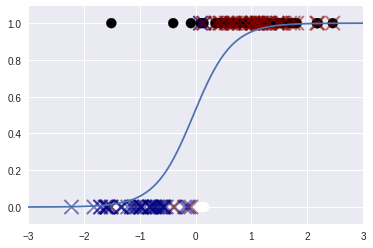

In [85]:
xx = np.linspace(-3, 3, 100)
sigm = 1.0/(1 + np.exp(-model.coef_[0][0]*xx - model.intercept_[0]))
plt.plot(xx, sigm)
plt.scatter(X0, y, marker='o', c=y, s=100)
plt.scatter(X0, model.predict(X0), marker='x', c=y, s=200, lw=2, alpha=0.5, cmap=mpl.cm.jet)
plt.xlim(-3, 3)
plt.show()

## statsmodels 패키지의 로지스틱 회귀

statsmodels 패키지는 로지스틱 회귀 모형 `Logit` 를 제공한다. 사용방법은 `OLS` 와 동일하다. Scikit-Learn 패키지와 달리 `Logit` 클래스는 classification 되기 전의 값을 출력한다

In [86]:
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Fri, 07 Jul 2017   Pseudo R-squ.:                  0.7679
Time:                        14:58:29   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
                                        LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


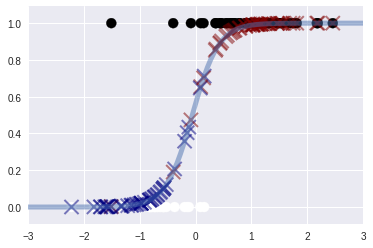

In [87]:
xx = np.linspace(-3, 3, 100)
sigmoid = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, sigmoid, lw=5, alpha=0.5)
plt.scatter(X0, y, marker='o', c=y, s=100)
plt.scatter(X0, logit_res.predict(X), marker='x', c=y, s=200, lw=2, alpha=0.5, cmap=mpl.cm.jet)
plt.xlim(-3, 3)
plt.show()

## 예제 1: Michelin and Zagat 가이드 비교

다음 데이터는 뉴욕시의 레스토랑에 대한 두 개의 가이드북에서 발취한 것이다.

* Food: Zagat Survey 2006 의 고객 평가 점수
* InMichelin: 해당 고객 평가 점수를 받은 레스토랑 중 2006 Michelin Guide New York City 에 실린 레스토랑의 수
* NotInMichelin: 해당 고객 평가 점수를 받은 레스토랑 중 2006 Michelin Guide New York City 에 실리지 않은 레스토랑의 수
* mi: 해당 고객 평가 점수를 받은 레스토랑의 수
* proportion: 해당 고객 평가 점수를 받은 레스토랑 중 2006 Michelin Guide New York City 에 실린 레스토랑의 비율

In [89]:
%cd ~/data
!wget "http://www.stat.tamu.edu/~sheather/book/docs/datasets/MichelinFood.txt"

[Errno 2] No such file or directory: '/home/jihoon_kim/data'
/home/jihoon_kim/Documents/Career/Fast_Campus_Data_Science_School/FC_DSS_5th/class
--2017-07-07 14:58:54--  http://www.stat.tamu.edu/~sheather/book/docs/datasets/MichelinFood.txt
Resolving www.stat.tamu.edu (www.stat.tamu.edu)... 165.91.112.167
Connecting to www.stat.tamu.edu (www.stat.tamu.edu)|165.91.112.167|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 269 [text/plain]
Saving to: ‘MichelinFood.txt’

MichelinFood.txt    100%[===================>]     269  --.-KB/s    in 0s      

2017-07-07 14:58:55 (39.7 MB/s) - ‘MichelinFood.txt’ saved [269/269]



In [91]:
df = pd.read_table("MichelinFood.txt")
df

,Food,InMichelin,NotInMichelin,mi,proportion
0,15,0,1,1,0.00
1,16,0,1,1,0.00
2,17,0,8,8,0.00
3,18,2,13,15,0.13
4,19,5,13,18,0.28
5,20,8,25,33,0.24
6,21,15,11,26,0.58
7,22,4,8,12,0.33
8,23,12,6,18,0.67
9,24,6,1,7,0.86


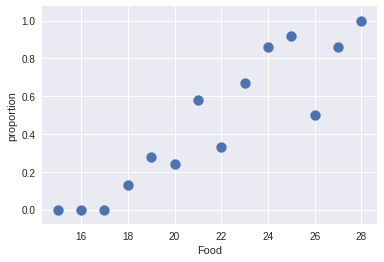

In [92]:
df.plot(kind="scatter", x="Food", y="proportion", s=100)
plt.show()

In [93]:
X = sm.add_constant(df.Food)
y = df.proportion
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.355086
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             proportion   No. Observations:                   14
Model:                          Logit   Df Residuals:                       12
Method:                           MLE   Df Model:                            1
Date:                Fri, 07 Jul 2017   Pseudo R-squ.:                  0.4832
Time:                        15:25:26   Log-Likelihood:                -4.9712
converged:                       True   LL-Null:                       -9.6189
                                        LLR p-value:                  0.002297
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.3600      5.211     -1.988      0.047     -20.574      -0.146
Food           0.4671      0.

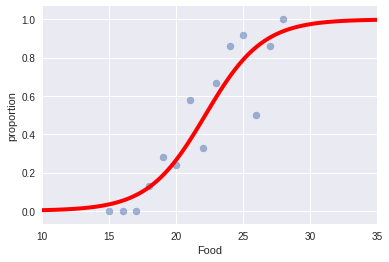

In [94]:
df.plot(kind="scatter", x="Food", y="proportion", s=50, alpha=0.5)
xx = np.linspace(10, 35, 100)
plt.plot(xx, result.predict(sm.add_constant(xx)), "r", lw=4)
plt.xlim(10, 35)
plt.show()

## 예제 2: Michelin 가이드 예측

다음 데이터는 뉴욕시의 개별 레스토랑의 고객 평가 점수와 Michelin 가이드 수록 여부를 보인 것이다.


* InMichelin: Michelin 가이드 수록 여부
* Restaurant Name: 레스토랑 이름
* Food: 식사에 대한 고객 평가 점수 (1~30)
* Decor: 인테리어에 대한 고객 평가 점수 (1~30)
* Service: 서비스에 대한 고객 평가 점수 (1~30)
* Price: 저녁 식사 가격 (US$)


In [95]:
%cd ~/data
!wget "http://www.stat.tamu.edu/~sheather/book/docs/datasets/MichelinNY.csv"

[Errno 2] No such file or directory: '/home/jihoon_kim/data'
/home/jihoon_kim/Documents/Career/Fast_Campus_Data_Science_School/FC_DSS_5th/class
--2017-07-07 15:25:45--  http://www.stat.tamu.edu/~sheather/book/docs/datasets/MichelinNY.csv
Resolving www.stat.tamu.edu (www.stat.tamu.edu)... 165.91.112.167
Connecting to www.stat.tamu.edu (www.stat.tamu.edu)|165.91.112.167|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4375 (4.3K) [text/csv]
Saving to: ‘MichelinNY.csv’

MichelinNY.csv      100%[===================>]   4.27K  --.-KB/s    in 0.001s  

2017-07-07 15:25:47 (5.39 MB/s) - ‘MichelinNY.csv’ saved [4375/4375]



In [114]:
df = pd.read_csv("MichelinNY.csv", encoding = "ISO-8859-1")
df.tail()

,InMichelin,Restaurant Name,Food,Decor,Service,Price
159,0,Terrace in the Sky,23,25,21,62
160,1,Tocqueville,25,21,24,65
161,1,Triomphe,25,22,22,65
162,0,Village,20,20,19,40
163,1,Vong,23,24,21,60


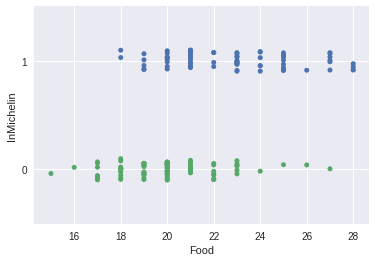

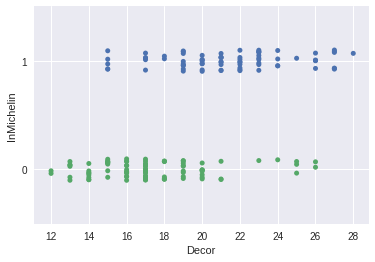

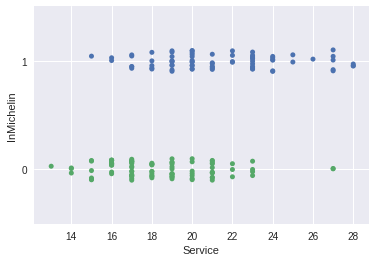

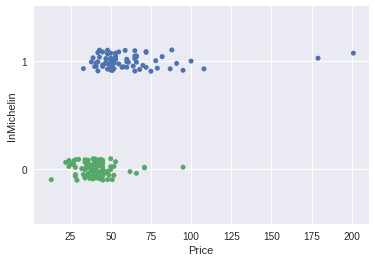

In [119]:
sns.stripplot(x="Food", y="InMichelin", data=df, jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()
sns.stripplot(x="Decor", y="InMichelin", data=df, jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()
sns.stripplot(x="Service", y="InMichelin", data=df, jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()
sns.stripplot(x="Price", y="InMichelin", data=df, jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()

In [117]:
X = sm.add_constant(df.Food)
y = df.InMichelin
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())
X = sm.add_constant(df.Decor)
y = df.InMichelin
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())
X = sm.add_constant(df.Service)
y = df.InMichelin
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())
X = sm.add_constant(df.Price)
y = df.InMichelin
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.535763
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             InMichelin   No. Observations:                  164
Model:                          Logit   Df Residuals:                      162
Method:                           MLE   Df Model:                            1
Date:                Fri, 07 Jul 2017   Pseudo R-squ.:                  0.2217
Time:                        15:44:34   Log-Likelihood:                -87.865
converged:                       True   LL-Null:                       -112.89
                                        LLR p-value:                 1.492e-12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.8415      1.862     -5.821      0.000     -14.492      -7.191
Food           0.5012      0.

21.8686868687


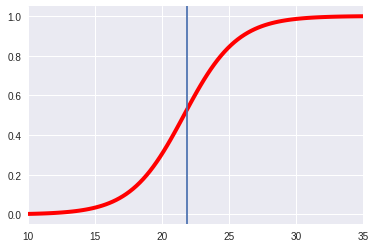

In [101]:
xx = np.linspace(10, 35, 100)
pred = result.predict(sm.add_constant(xx))
decision_value = xx[np.argmax(pred > 0.5)]
print(decision_value)
plt.plot(xx, pred, "r", lw=4)
plt.axvline(decision_value)
plt.xlim(10, 35)
plt.show()

## 예제 3: Fair's Affair Dataset

In [102]:
print(sm.datasets.fair.SOURCE)
print(sm.datasets.fair.NOTE)


Fair, Ray. 1978. "A Theory of Extramarital Affairs," `Journal of Political
Economy`, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agr

In [103]:
df = sm.datasets.fair.load_pandas().data
df['BinaryAffair'] = (df['affairs'] > 0).astype(float)
df.sample(5, random_state=1)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,BinaryAffair
4269,3.0,27.0,9.0,1.0,3.0,12.0,5.0,4.0,0.000000,0.0
1147,2.0,27.0,6.0,1.0,2.0,12.0,2.0,2.0,0.583333,1.0
1683,4.0,37.0,13.0,3.0,1.0,12.0,4.0,4.0,0.615385,1.0
2992,4.0,27.0,2.5,1.0,2.0,12.0,3.0,5.0,0.000000,0.0
5114,3.0,37.0,16.5,2.0,3.0,14.0,3.0,3.0,0.000000,0.0


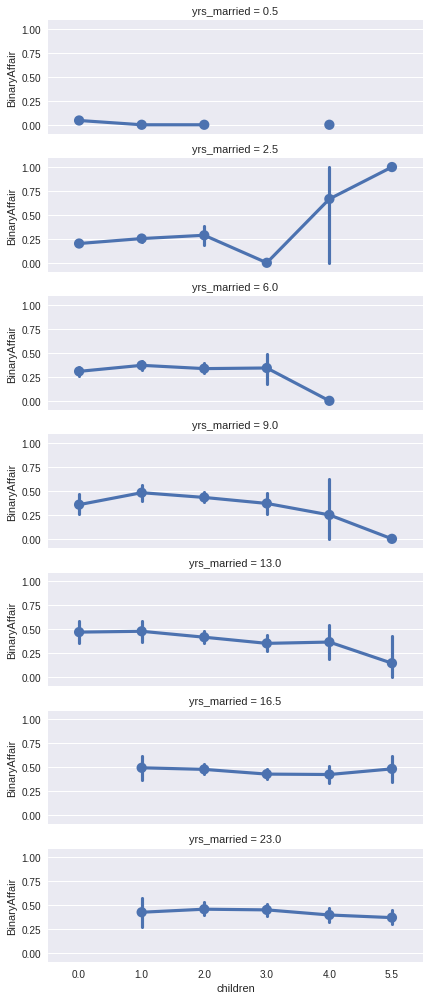

In [104]:
sns.factorplot(x="children", y="BinaryAffair", row="yrs_married", data=df,
               orient="v", size=2, aspect=3, kind="point")
plt.show()

In [111]:
import statsmodels.formula.api as smf
modoel = smf.logit("BinaryAffair ~ rate_marriage + religious + yrs_married + age + educ + children", df).fit()
print(modoel.summary())

Optimization terminated successfully.
         Current function value: 0.547174
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           BinaryAffair   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6359
Method:                           MLE   Df Model:                            6
Date:                Fri, 07 Jul 2017   Pseudo R-squ.:                  0.1297
Time:                        15:31:02   Log-Likelihood:                -3483.3
converged:                       True   LL-Null:                       -4002.5
                                        LLR p-value:                4.345e-221
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.8350      0.296     12.940      0.000       3.254       4.416
rate_marriage    -0.

# QDA and LDA

## QDA

QDA(quadratic discriminant analysis)는 Y 클래스에 대한 독립 변수 X의 조건부 확률 분포가 다변수 가우시안 정규 분포(multivariate Gaussian normal distribution)이라는 가정을 한다.

$$
p(x \mid y = k) = \dfrac{1}{(2\pi)^{D/2} |\Sigma_k|^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu_k)^T \Sigma_k^{-1} (x-\mu_k) \right)
$$

이 분포들을 알고 있으면 독립 변수 X에 대한 Y 클래스의 조건부 확률 분포는 다음과 같이 베이즈 규칙으로부터 구할 수 있다.

$$
P(y=k \mid x) = \dfrac{p(x \mid y = k)P(y=k)}{p(x)} = \dfrac{p(x \mid y = k)P(y=k)}{\sum_l p(x \mid y = l)P(y=l) }
$$

예를 들어 Y 가  1, 2, 3 이라는 3개의 클래스를 가지고 각 클래스에서의 X 의 확률 변수가 다음과 같은 기대값 및 공분산 행렬을 가진다고 가정하자.

$$
\mu_1 = \begin{bmatrix}  0 \\ 0 \end{bmatrix}, \;\;
\mu_2 = \begin{bmatrix}  1 \\ 1 \end{bmatrix}, \;\;
\mu_3 = \begin{bmatrix}-1  \\ 1 \end{bmatrix}
$$

$$
\Sigma_1 = \begin{bmatrix} 0.7 &   0 \\ 0   & 0.7 \end{bmatrix}, \;\;
\Sigma_2 = \begin{bmatrix} 0.8 & 0.2 \\ 0.2 & 0.8 \end{bmatrix}, \;\;
\Sigma_3 = \begin{bmatrix} 0.8 & 0.2 \\ 0.2 & 0.8 \end{bmatrix}
$$

Y의 사전 확률은 다음과 같이 동일하다

$$
P(Y=1) = P(Y=2) = P(Y=3) = \dfrac{1}{3}
$$

In [145]:
N = 100
np.random.seed(0)
X1 = sp.stats.multivariate_normal([ 0, 0], [[0.7, 0],[0, 0.7]]).rvs(100)
X2 = sp.stats.multivariate_normal([ 1, 1], [[0.8, 0.2],[0.2, 0.8]]).rvs(100)
X3 = sp.stats.multivariate_normal([-1, 1], [[0.8, 0.2],[0.2, 0.8]]).rvs(100)
y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2*np.ones(N)
X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])

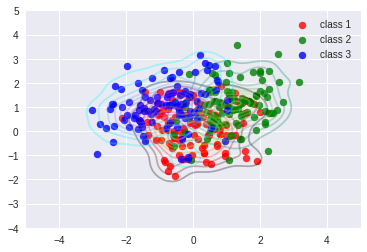

In [146]:
plt.scatter(X1[:,0], X1[:,1], alpha=0.8, s=50, color='r', label="class 1")
plt.scatter(X2[:,0], X2[:,1], alpha=0.8, s=50, color='g', label="class 2")
plt.scatter(X3[:,0], X3[:,1], alpha=0.8, s=50, color='b', label="class 3")
sns.kdeplot(X1[:,0], X1[:,1], alpha=0.3, cmap=mpl.cm.hot)
sns.kdeplot(X2[:,0], X2[:,1], alpha=0.3, cmap=mpl.cm.summer)
sns.kdeplot(X3[:,0], X3[:,1], alpha=0.3, cmap=mpl.cm.cool)
plt.xlim(-5,5)
plt.ylim(-4,5)
plt.legend()
plt.show()

In [147]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariances=True).fit(X, y)

In [148]:
qda.means_

array([[ -8.01254084e-04,   1.19457204e-01],
       [  1.16303727e+00,   1.03930605e+00],
       [ -8.64060404e-01,   1.02295794e+00]])

In [149]:
qda.priors_

array([ 0.33333333,  0.33333333,  0.33333333])

In [150]:
qda.covariances_[0]

array([[ 0.73846319, -0.01762041],
       [-0.01762041,  0.72961278]])

In [151]:
qda.covariances_[1]

array([[ 0.66534246,  0.21132313],
       [ 0.21132313,  0.78806006]])

In [152]:
qda.covariances_[2]

array([[ 0.9351386 ,  0.22880955],
       [ 0.22880955,  0.79142383]])

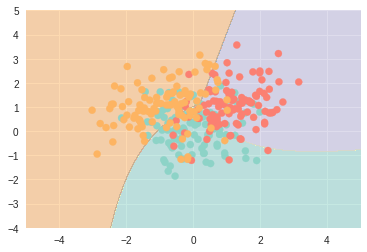

In [153]:
xmin, xmax = -5, 5
ymin, ymax = -4, 5
XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
ZZ = np.reshape(qda.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette("Set3"))
plt.contourf(XX, YY, ZZ, cmap=cmap, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()

In [154]:
X[0]

array([ 1.47591208,  0.33479554])

In [157]:
sample = [1.0, 3.0]
sample_prob = qda.predict_proba([sample])
print(sample_prob)

[[ 0.01682118  0.6745444   0.30863442]]


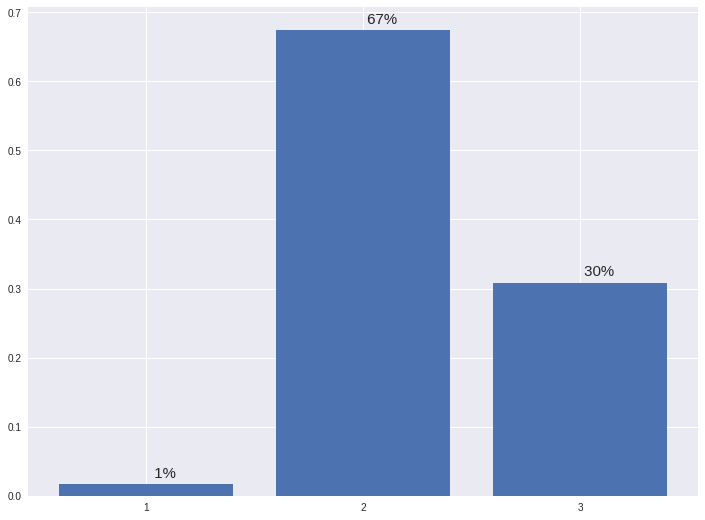

In [254]:
x = [1, 2, 3]
y = sample_prob[0]
plt.figure(figsize=(12,9))
plt.bar(x, y)
plt.xticks([1,2,3])

for a,b in zip(x,y):
    plt.text(a, b+0.01, '{0:3d}'.format(int(b*100)) + '%', fontsize=15)

plt.show()

## LDA

LDA(linear discriminant analysis)에서는 각 Y 클래스에 대한 독립 변수 X의 조건부 확률 분포가 **공통된 공분산 행렬을 가지는** 다변수 가우시안 정규 분포(multivariate Gaussian normal distribution)이라고 가정한다. 즉

$$ \Sigma_k = \Sigma \;\;\; \text{ for all } k $$

이다.

이 때는 조건부 확률 분포를 다음과 같이 정리할 수 있다.

$$
\begin{eqnarray}
\log p(x \mid y = k) 
&=& \log \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} -  \dfrac{1}{2} (x-\mu_k)^T \Sigma^{-1} (x-\mu_k) \\
&=& C_0 - \dfrac{1}{2} (x-\mu_k)^T \Sigma^{-1} (x-\mu_k) \\
&=& C_0 - \dfrac{1}{2} \left( x^T\Sigma^{-1}x - 2\mu_k^T \Sigma^{-1}x + \mu_k^T \Sigma^{-1}\mu_k \right) \\
&=& C(x)  + \mu_k^T \Sigma^{-1}x - \dfrac{1}{2} \mu_k^T \Sigma^{-1}\mu_k \\
\end{eqnarray}
$$


$$
\begin{eqnarray}
p(x \mid y = k) 
&=& C(x)\exp(w_k^Tx + w_{k0}) \\
\end{eqnarray}
$$

$$
\begin{eqnarray}
P(y=k \mid x) 
&=& \dfrac{p(x \mid y = k)P(y=k)}{\sum_l p(x \mid y = l)P(y=l) } \\
&=& \dfrac{C(x)\exp(w_k^Tx + w_{k0}) P(y=k)}{\sum_l C(x)\exp(w_k^Tx + w_{k0})P(y=l) } \\
&=& \dfrac{P_k \exp(w_k^Tx + w_{k0}) }{\sum_l P_l \exp(w_k^Tx + w_{k0})} \\
\end{eqnarray}
$$

$$
\log P(y=k \mid x) = \log P_k + w_k^Tx + w_{k0} - \sum_l \left( \log P_l + w_l^Tx + w_{l0} \right) = w^T x + w_0
$$

즉, 조건부 확률 변수가 x에 대한 선형 방정식이 된다.

In [128]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3, solver="svd", store_covariance=True).fit(X, y)

In [129]:
lda.means_

array([[ -8.01254084e-04,   1.19457204e-01],
       [  1.16303727e+00,   1.03930605e+00],
       [ -8.64060404e-01,   1.02295794e+00]])

In [130]:
lda.covariance_

array([[ 0.7718516 ,  0.13942905],
       [ 0.13942905,  0.7620019 ]])

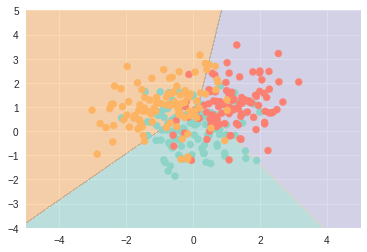

In [131]:
xmin, xmax = -5, 5
ymin, ymax = -4, 5
XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
ZZ = np.reshape(lda.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette("Set3"))
plt.contourf(XX, YY, ZZ, cmap=cmap, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()